# Springboard - Data Science Career Track - Capstone 1

In [253]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import patsy as pts
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [254]:
# Read in data from CSV
df = pd.read_csv('allCongressDataPublish.csv')

# Inspect the data
df.head()

,stateDist,abroadPrcnt,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,prcntExAliens,totalHouseholds,under10k,over10k,over15k,...,numPassH,numEnact,passPrcnt,congNum,partyControl,demSeats,repSeats,otherSeats,ses,sesNorm
0,AK.0,NaN,54.541518,588358.0,1.327253,NaN,106181.0,14.029817,85.970183,78.523465,...,3.0,2.0,6.666667,93.0,D,243.0,192.0,0.0,0.147659,35.339666
1,AL.1,NaN,15.405078,543377.0,0.457325,NaN,148712.0,20.154392,79.845608,72.468261,...,0.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.075380,11.690437
2,AL.2,NaN,24.197693,530286.0,0.495582,NaN,165462.0,23.441636,76.558364,67.187632,...,2.0,1.0,3.030303,93.0,D,243.0,192.0,0.0,-1.097884,11.255282
3,AL.3,NaN,20.234837,555795.0,0.317203,NaN,162704.0,25.357090,74.642910,66.138509,...,1.0,0.0,0.000000,93.0,D,243.0,192.0,0.0,-1.264190,8.039513
4,AL.4,NaN,15.244589,493752.0,0.148253,NaN,159228.0,21.855453,78.144547,69.694400,...,1.0,1.0,5.882353,93.0,D,243.0,192.0,0.0,-1.435099,4.734744


In [255]:
# Delete unneeded columns
del df['abroadPrcnt']
del df['prcntExAliens']
del df['totalHouseholds']
del df['meanIncome']
del df['medianIncome']
del df['totalEmploymentPop']
del df['prcntNotEmploy']
del df['totalPopRaceFile']
del df['prcntBlackNotHisp']
del df['prcntMulti']
del df['prcntWhite']
del df['prcntNotHisp']
del df['prcntOld']
del df['medianAge']
del df['sponID']
del df['icpsr']
del df['state']
del df['district']
del df['lastName']
del df['firstName']
del df['middleName']
del df['age']
del df['gender']
del df['numberTerms']
del df['daysServed']
del df['fracServed']
del df['cd']
del df['statenm']
del df['dwnom1']
del df['dwnom2']
del df['comPower']
del df['chair']
del df['rank']
del df['comName']
del df['numCom']
del df['rankChair']
del df['black']
del df['hispanic']
del df['numSpon']
del df['numCosp']
del df['numPassH']
del df['numEnact']
del df['passPrcnt']
del df['partyControl']
del df['demSeats']
del df['repSeats']
del df['otherSeats']
del df['ses']
del df['sesNorm']

# Inspect the data
df.head()

,stateDist,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,under10k,over10k,over15k,over25k,over35k,over50k,...,prcntUnemp,prcntBA,prcntHS,prcntAsian,prcntBlack,prcntHisp,prcntWhiteAll,gini,party,congNum
0,AK.0,54.541518,588358.0,1.327253,14.029817,85.970183,78.523465,72.888747,63.228826,49.549354,...,4.485170,14.140283,66.658073,3.148423,1.514894,1.530580,40.675065,0.128563,Republican,93.0
1,AL.1,15.405078,543377.0,0.457325,20.154392,79.845608,72.468261,64.847490,51.344881,31.147453,...,2.692152,6.830163,40.297523,0.276788,29.581856,1.632954,60.562372,0.064529,Republican,93.0
2,AL.2,24.197693,530286.0,0.495582,23.441636,76.558364,67.187632,58.843118,44.934789,27.204434,...,1.877222,8.356176,43.119566,0.117107,27.597372,0.820256,64.945143,0.060138,Republican,93.0
3,AL.3,20.234837,555795.0,0.317203,25.357090,74.642910,66.138509,58.930942,44.303152,25.725858,...,2.038250,6.874170,36.865034,0.072509,27.756277,1.018866,60.953049,0.052972,Democrat,93.0
4,AL.4,15.244589,493752.0,0.148253,21.855453,78.144547,69.694400,61.685131,46.047178,25.332228,...,2.535659,4.100965,32.548181,0.028962,8.503662,1.062788,91.135226,0.047624,Democrat,93.0


In [256]:
# Remove rows with missing values
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Remove 'Independent' rows contained in 'party' from the data 
df = df[df['party'] != 'Independent']

# Replace 'Republican-Conservative' rpws with 'Republican' in the data
df = df.replace(to_replace='Republican-Conservative', value='Republican')

# Convert non-numerical data using one-hot encoding
df = pd.get_dummies(df, columns=['party'])

# Delete the 'party_Republican' column
del df['party_Republican']

# Inspect the data
df.head()

,stateDist,recentArrivalPrcnt,totalPopBirthPlace,prcntForeignBorn,under10k,over10k,over15k,over25k,over35k,over50k,...,prcntUnemp,prcntBA,prcntHS,prcntAsian,prcntBlack,prcntHisp,prcntWhiteAll,gini,congNum,party_Democrat
0,AK.0,54.541518,588358.0,1.327253,14.029817,85.970183,78.523465,72.888747,63.228826,49.549354,...,4.485170,14.140283,66.658073,3.148423,1.514894,1.530580,40.675065,0.128563,93.0,0
1,AL.1,15.405078,543377.0,0.457325,20.154392,79.845608,72.468261,64.847490,51.344881,31.147453,...,2.692152,6.830163,40.297523,0.276788,29.581856,1.632954,60.562372,0.064529,93.0,0
2,AL.2,24.197693,530286.0,0.495582,23.441636,76.558364,67.187632,58.843118,44.934789,27.204434,...,1.877222,8.356176,43.119566,0.117107,27.597372,0.820256,64.945143,0.060138,93.0,0
3,AL.3,20.234837,555795.0,0.317203,25.357090,74.642910,66.138509,58.930942,44.303152,25.725858,...,2.038250,6.874170,36.865034,0.072509,27.756277,1.018866,60.953049,0.052972,93.0,1
4,AL.4,15.244589,493752.0,0.148253,21.855453,78.144547,69.694400,61.685131,46.047178,25.332228,...,2.535659,4.100965,32.548181,0.028962,8.503662,1.062788,91.135226,0.047624,93.0,1


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


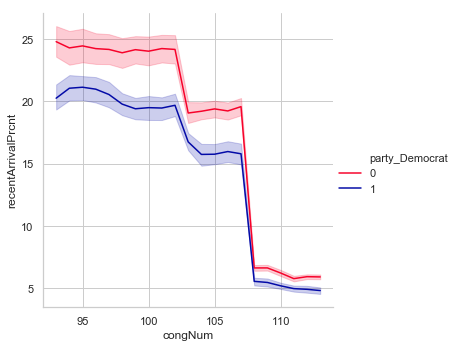

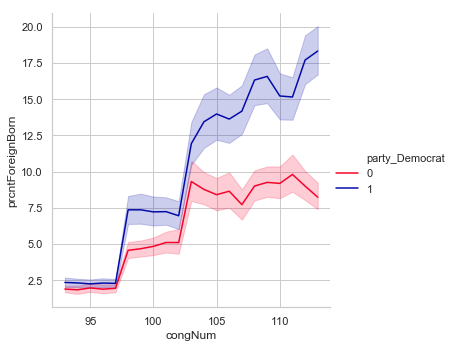

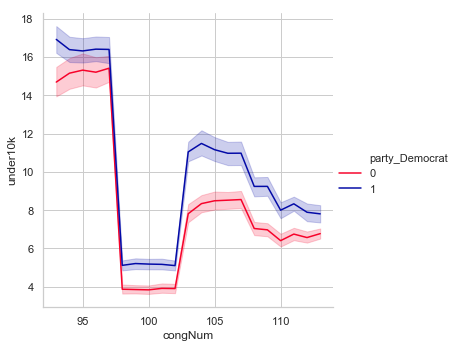

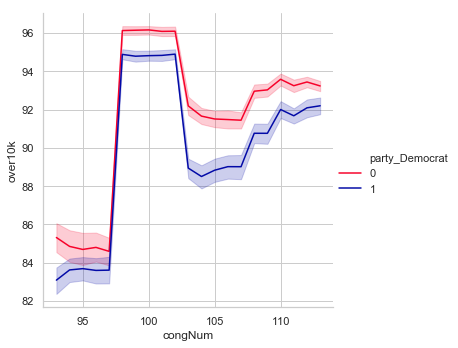

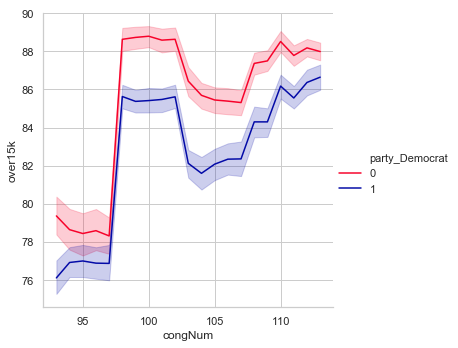

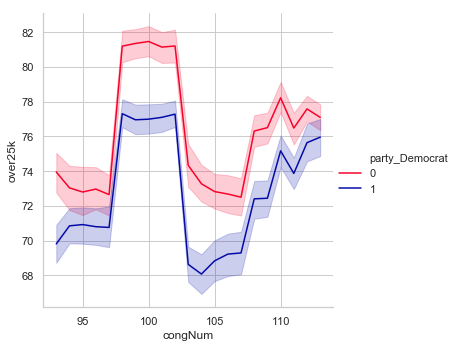

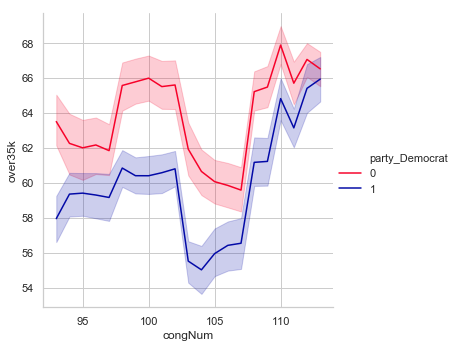

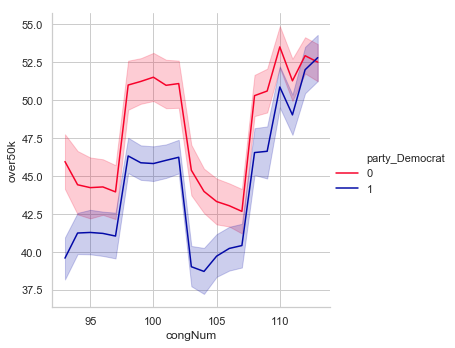

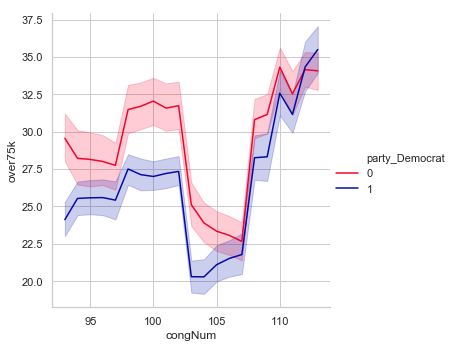

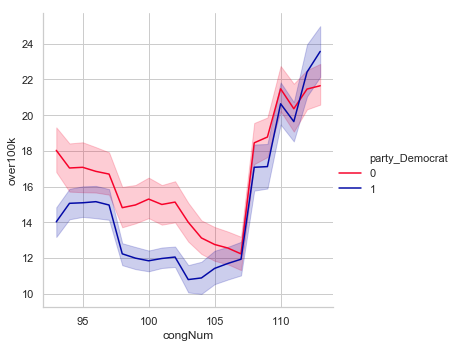

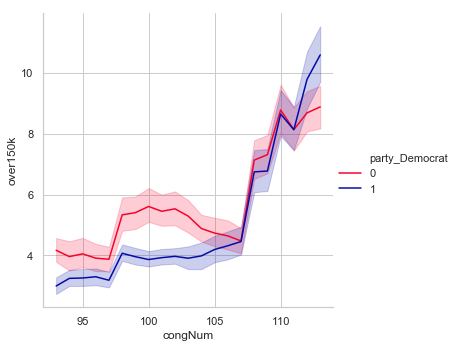

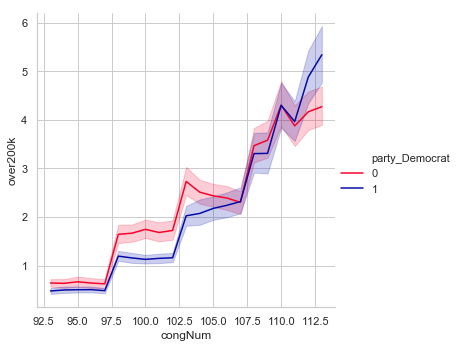

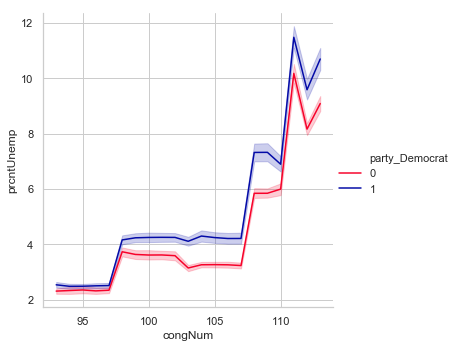

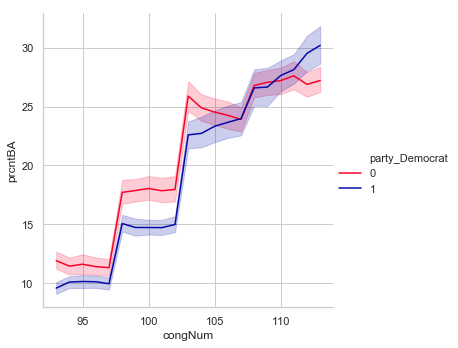

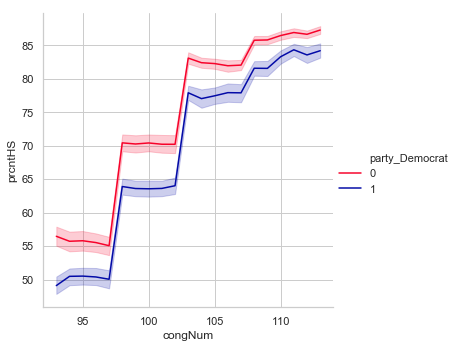

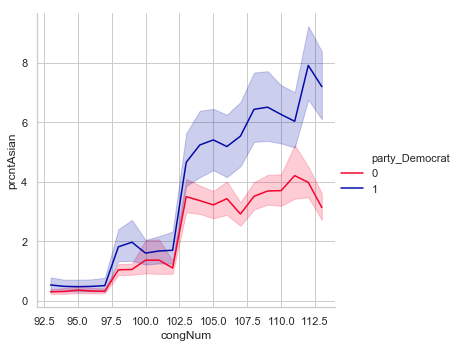

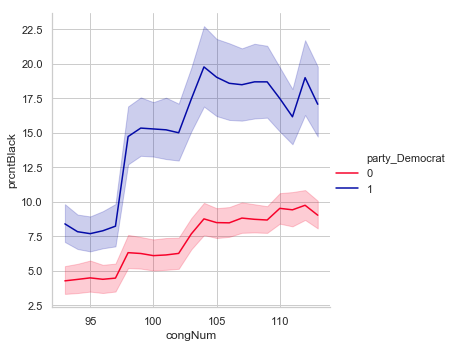

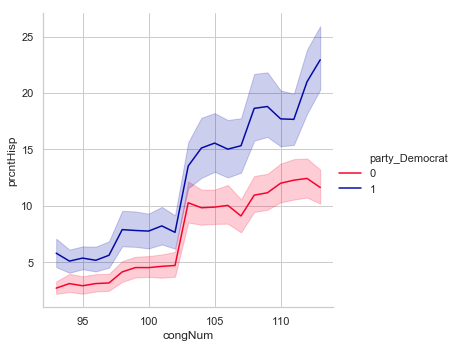

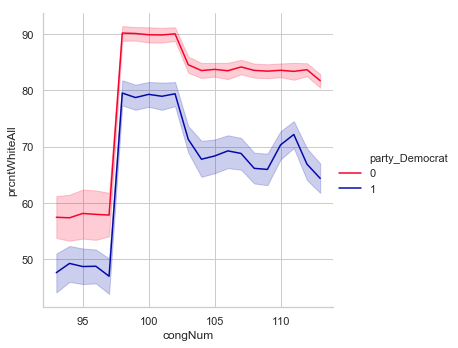

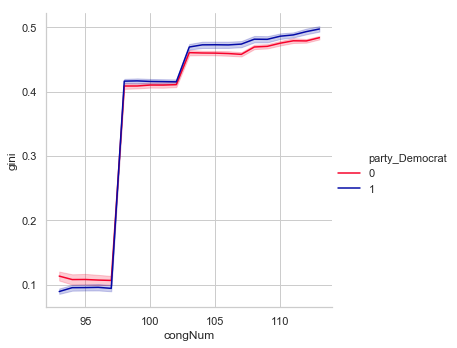

In [257]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')
colors = ['cherry red', 'cobalt blue']

# Perform graphical EDA on recentArrivalPrcnt
sns.relplot(x='congNum', y='recentArrivalPrcnt', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntForeignBorn
sns.relplot(x='congNum', y='prcntForeignBorn', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on under10k
sns.relplot(x='congNum', y='under10k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over10k
sns.relplot(x='congNum', y='over10k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over15k
sns.relplot(x='congNum', y='over15k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over25k
sns.relplot(x='congNum', y='over25k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over35k
sns.relplot(x='congNum', y='over35k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over50k
sns.relplot(x='congNum', y='over50k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over75k
sns.relplot(x='congNum', y='over75k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over100k
sns.relplot(x='congNum', y='over100k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over150k
sns.relplot(x='congNum', y='over150k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on over200k
sns.relplot(x='congNum', y='over200k', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntUnemp
sns.relplot(x='congNum', y='prcntUnemp', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntBA
sns.relplot(x='congNum', y='prcntBA', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntHS
sns.relplot(x='congNum', y='prcntHS', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntAsian
sns.relplot(x='congNum', y='prcntAsian', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntBlack
sns.relplot(x='congNum', y='prcntBlack', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntHisp
sns.relplot(x='congNum', y='prcntHisp', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on prcntWhiteAll
sns.relplot(x='congNum', y='prcntWhiteAll', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

# Perform graphical EDA on gini
sns.relplot(x='congNum', y='gini', hue='party_Democrat', kind='line', palette=sns.xkcd_palette(colors), data=df)

#### Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?

In general, it appears that there are large, national changes in certain variables that affect Democratic and Republican districts in the same way. For example, according to the graph plotting **recentArrivalPrcnt** there has been a distinct reduction in the mobility of Americans. 

The **recentArrivalPrcnt** variable tracks the percent of the district that recently moved into the district from another county or state. It definitely appears that between the 100th and 110th Congresses, there was a distinct reduction in the percentage of the district populations that recently moved from another county or state, suggesting that fewer people are moving and that people are more locked into their districts than they were historically.

In addition, it appears that the percent of the districts that was born in a foreign country has also increased in both Democratic and Republican districts - though this trends is significantly more pronounced in Democratic districts.

Additionally, unemployment rates have increased in both districts while High School and College graduation rates have increased in both as well.

Finally, it appears that inequality has increased (as measured by the gini coefficient - a smaller gini value signifying a more equal district) in both Democratic and Republican districts. 


#### Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?

Of course, we are more interested in those things that differentiate Democratic and Republican districts. Though many of these national trends are represented in both types of district, we also see many of these trends are being more pronounced in one type of district versus another.

For example, though mobility has declined is has declined less in Republican districts; and though the percent of the district that was born in a foreign country has also increased in both Democratic and Republican districts, this trend is dramatically more pronounced in Democratic districts, and has actually declined in recent years amongst Republican districts.

There also appears to be a distinct gap between Republican and Democratic districts when it comes to the percent of households earning more than 35,000 dollars. There is a large and persistent inequality, with a greater percentage of Republican district households earning more than 35,000 dollars.

Though graduation rates have increased for both High School and College in both Democratic and Republican districts Republican districts have a consistently higher rate of High School gradutaion, while Democatic districts have only recently outpaced Republican districts in terms of College graduation - a reversal of a long established trend.

The greatest divergences appear when we compare Democratic and Republican districts by racial composition. Democratic districts have consistently higher concentrations of Asian, Black, and Hispanic Americans than their Republican counteraparts, and both Democratic and Republican districts are becoming less white overall. 

In sum, the trends point toward a more static, highly educated, and diverse nation - but with these trends being far more pronounced in Democratic districts than in Republican ones. Therefore, it is my contention that as we look to predict a district's party affiliation we will see that more static, highly educated, and diverse districts will vote Democratics, while more mobile, less educated, and more homogenous districts will vote Republican.

In [258]:
# Seperate out the Democrat and Republican data for statistical comparison
Democrat_df = df[df['party_Democrat'] == 1]
Democrat_df = Democrat_df[['recentArrivalPrcnt', 'prcntForeignBorn', 'under10k', 'over10k', 'over15k', 'over25k', 'over35k', 'over50k', 'over75k', 'over100k', 'over150k', 'over200k', 'prcntUnemp', 'prcntBA', 'prcntHS', 'prcntAsian', 'prcntBlack', 'prcntHisp', 'prcntWhiteAll', 'gini']]

Republican_df = df[df['party_Democrat'] == 0]
Republican_df = Republican_df[['recentArrivalPrcnt', 'prcntForeignBorn', 'under10k', 'over10k', 'over15k', 'over25k', 'over35k', 'over50k', 'over75k', 'over100k', 'over150k', 'over200k', 'prcntUnemp', 'prcntBA', 'prcntHS', 'prcntAsian', 'prcntBlack', 'prcntHisp', 'prcntWhiteAll', 'gini']]

# Calculate summary statistics on the two data sets
print(Democrat_df.describe().transpose())
print(Republican_df.describe().transpose())

                     count       mean        std        min        25%  \
recentArrivalPrcnt  5124.0  15.429270   9.041663   0.700000   7.100000   
prcntForeignBorn    5124.0   9.613794  11.261435   0.138861   1.706375   
under10k            5124.0  10.298618   5.936332   1.665103   5.655016   
over10k             5124.0  89.697928   5.938921  67.818984  86.132167   
over15k             5124.0  82.460148   7.066203  58.243076  78.355347   
over25k             5124.0  72.867819   8.702131  43.200000  67.241762   
over35k             5124.0  59.953064  10.459990  29.205036  52.579850   
over50k             5124.0  44.230729  11.791548  17.212318  35.497840   
over75k             5124.0  26.505244  10.570568   6.900000  18.575103   
over100k            5124.0  14.709576   8.276949   2.179128   8.789134   
over150k            5124.0   4.955634   4.375586   0.481448   2.369737   
over200k            5124.0   1.975897   2.562320   0.041587   0.600000   
prcntUnemp          5124.0   4.980536 

In [259]:
# Create variables X and y arrays from the dataset
features_df = df.drop(columns=['stateDist', 'congNum', 'party_Democrat'])

X = features_df
y = df['party_Democrat']

# Run a logit model on the data to determine p-values
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

# Remove insignificant variables from the model
features_df = features_df.drop(columns=['over25k', 'over75k', 'over150k', 'over200k', 'prcntUnemp'])

X = features_df

# Run a second logit model on the data to determine new p-values
logit_model=sm.Logit(y, X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: inf
         Iterations 6


/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                          Results: Logit
Model:                Logit              Pseudo R-squared:   inf   
Dependent Variable:   party_Democrat     AIC:                inf   
Date:                 2019-02-04 13:38   BIC:                inf   
No. Observations:     9298               Log-Likelihood:     -inf  
Df Model:             20                 LL-Null:            0.0000
Df Residuals:         9277               LLR p-value:        1.0000
Converged:            1.0000             Scale:              1.0000
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
recentArrivalPrcnt -0.0370   0.0041  -8.9709 0.0000 -0.0450 -0.0289
totalPopBirthPlace -0.0000   0.0000  -2.2300 0.0257 -0.0000 -0.0000
prcntForeignBorn    0.0624   0.0069   9.0382 0.0000  0.0489  0.0760
under10

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:3313: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [260]:
# Create pearson_r function to determine correlation amongst the remaining significant variables
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

recentArrivalPrcnt_totalPopBirthPlace_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['totalPopBirthPlace'])
print('Pearson Correlation between recentArrivalPrcnt and totalPopBirthPlace: ' + str(recentArrivalPrcnt_totalPopBirthPlace_r))

recentArrivalPrcnt_prcntForeignBorn_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntForeignBorn'])
print('Pearson Correlation between recentArrivalPrcnt and prcntForeignBorn: ' + str(recentArrivalPrcnt_prcntForeignBorn_r))

recentArrivalPrcnt_under10k_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['under10k'])
print('Pearson Correlation between recentArrivalPrcnt and under10k: ' + str(recentArrivalPrcnt_under10k_r))

recentArrivalPrcnt_over10k_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['over10k'])
print('Pearson Correlation between recentArrivalPrcnt and over10k: ' + str(recentArrivalPrcnt_over10k_r))

recentArrivalPrcnt_over15k_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['over15k'])
print('Pearson Correlation between recentArrivalPrcnt and over15k: ' + str(recentArrivalPrcnt_over15k_r))

recentArrivalPrcnt_over35k_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['over35k'])
print('Pearson Correlation between recentArrivalPrcnt and over35k: ' + str(recentArrivalPrcnt_over35k_r))

recentArrivalPrcnt_over50k_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['over50k'])
print('Pearson Correlation between recentArrivalPrcnt and over50k: ' + str(recentArrivalPrcnt_over50k_r))

recentArrivalPrcnt_over100k_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['over100k'])
print('Pearson Correlation between recentArrivalPrcnt and over100k: ' + str(recentArrivalPrcnt_over100k_r))

recentArrivalPrcnt_prcntBA_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntBA'])
print('Pearson Correlation between recentArrivalPrcnt and prcntBA: ' + str(recentArrivalPrcnt_prcntBA_r))

recentArrivalPrcnt_prcntHS_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntHS'])
print('Pearson Correlation between recentArrivalPrcnt and prcntHS: ' + str(recentArrivalPrcnt_prcntHS_r))

recentArrivalPrcnt_prcntAsian_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntAsian'])
print('Pearson Correlation between recentArrivalPrcnt and prcntAsian: ' + str(recentArrivalPrcnt_prcntAsian_r))

recentArrivalPrcnt_prcntBlack_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntBlack'])
print('Pearson Correlation between recentArrivalPrcnt and prcntBlack: ' + str(recentArrivalPrcnt_prcntBlack_r))

recentArrivalPrcnt_prcntHisp_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntHisp'])
print('Pearson Correlation between recentArrivalPrcnt and prcntHisp: ' + str(recentArrivalPrcnt_prcntHisp_r))

recentArrivalPrcnt_prcntWhiteAll_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['prcntWhiteAll'])
print('Pearson Correlation between recentArrivalPrcnt and prcntWhiteAll: ' + str(recentArrivalPrcnt_prcntWhiteAll_r))

recentArrivalPrcnt_gini_r = pearson_r(features_df['recentArrivalPrcnt'], features_df['gini'])
print('Pearson Correlation between recentArrivalPrcnt and gini: ' + str(recentArrivalPrcnt_gini_r))

totalPopBirthPlace_prcntForeignBorn_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntForeignBorn'])
print('Pearson Correlation between totalPopBirthPlace and prcntForeignBorn: ' + str(totalPopBirthPlace_prcntForeignBorn_r))

totalPopBirthPlace_under10k_r = pearson_r(features_df['totalPopBirthPlace'], features_df['under10k'])
print('Pearson Correlation between totalPopBirthPlace and under10k: ' + str(totalPopBirthPlace_under10k_r))

totalPopBirthPlace_over10k_r = pearson_r(features_df['totalPopBirthPlace'], features_df['over10k'])
print('Pearson Correlation between totalPopBirthPlace and over10k: ' + str(totalPopBirthPlace_over10k_r))

totalPopBirthPlace_over15k_r = pearson_r(features_df['totalPopBirthPlace'], features_df['over15k'])
print('Pearson Correlation between totalPopBirthPlace and over15k: ' + str(totalPopBirthPlace_over15k_r))

totalPopBirthPlace_over35k_r = pearson_r(features_df['totalPopBirthPlace'], features_df['over35k'])
print('Pearson Correlation between totalPopBirthPlace and over35k: ' + str(totalPopBirthPlace_over35k_r))

totalPopBirthPlace_over50k_r = pearson_r(features_df['totalPopBirthPlace'], features_df['over50k'])
print('Pearson Correlation between totalPopBirthPlace and over50k: ' + str(totalPopBirthPlace_over50k_r))

totalPopBirthPlace_over100k_r = pearson_r(features_df['totalPopBirthPlace'], features_df['over100k'])
print('Pearson Correlation between totalPopBirthPlace and over100k: ' + str(totalPopBirthPlace_over100k_r))

totalPopBirthPlace_prcntBA_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntBA'])
print('Pearson Correlation between totalPopBirthPlace and prcntBA: ' + str(totalPopBirthPlace_prcntBA_r))

totalPopBirthPlace_prcntHS_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntHS'])
print('Pearson Correlation between totalPopBirthPlace and prcntHS: ' + str(totalPopBirthPlace_prcntHS_r))

totalPopBirthPlace_prcntAsian_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntAsian'])
print('Pearson Correlation between totalPopBirthPlace and prcntAsian: ' + str(totalPopBirthPlace_prcntAsian_r))

totalPopBirthPlace_prcntBlack_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntBlack'])
print('Pearson Correlation between totalPopBirthPlace and prcntBlack: ' + str(totalPopBirthPlace_prcntBlack_r))

totalPopBirthPlace_prcntHisp_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntHisp'])
print('Pearson Correlation between totalPopBirthPlace and prcntHisp: ' + str(totalPopBirthPlace_prcntHisp_r))

totalPopBirthPlace_prcntWhiteAll_r = pearson_r(features_df['totalPopBirthPlace'], features_df['prcntWhiteAll'])
print('Pearson Correlation between totalPopBirthPlace and prcntWhiteAll: ' + str(totalPopBirthPlace_prcntWhiteAll_r))

totalPopBirthPlace_gini_r = pearson_r(features_df['totalPopBirthPlace'], features_df['gini'])
print('Pearson Correlation between totalPopBirthPlace and gini: ' + str(totalPopBirthPlace_gini_r))

prcntForeignBorn_under10k_r = pearson_r(features_df['prcntForeignBorn'], features_df['under10k'])
print('Pearson Correlation between prcntForeignBorn and under10k: ' + str(prcntForeignBorn_under10k_r))

prcntForeignBorn_over10k_r = pearson_r(features_df['prcntForeignBorn'], features_df['over10k'])
print('Pearson Correlation between prcntForeignBorn and over10k: ' + str(prcntForeignBorn_over10k_r))

prcntForeignBorn_over15k_r = pearson_r(features_df['prcntForeignBorn'], features_df['over15k'])
print('Pearson Correlation between prcntForeignBorn and over15k: ' + str(prcntForeignBorn_over15k_r))

prcntForeignBorn_over35k_r = pearson_r(features_df['prcntForeignBorn'], features_df['over35k'])
print('Pearson Correlation between prcntForeignBorn and over35k: ' + str(prcntForeignBorn_over35k_r))

prcntForeignBorn_over50k_r = pearson_r(features_df['prcntForeignBorn'], features_df['over50k'])
print('Pearson Correlation between prcntForeignBorn and over50k: ' + str(prcntForeignBorn_over50k_r))

prcntForeignBorn_over100k_r = pearson_r(features_df['prcntForeignBorn'], features_df['over100k'])
print('Pearson Correlation between prcntForeignBorn and over100k: ' + str(prcntForeignBorn_over100k_r))

prcntForeignBorn_prcntBA_r = pearson_r(features_df['prcntForeignBorn'], features_df['prcntBA'])
print('Pearson Correlation between prcntForeignBorn and prcntBA: ' + str(prcntForeignBorn_prcntBA_r))

prcntForeignBorn_prcntHS_r = pearson_r(features_df['prcntForeignBorn'], features_df['prcntHS'])
print('Pearson Correlation between prcntForeignBorn and prcntHS: ' + str(prcntForeignBorn_prcntHS_r))

prcntForeignBorn_prcntAsian_r = pearson_r(features_df['prcntForeignBorn'], features_df['prcntAsian'])
print('Pearson Correlation between prcntForeignBorn and prcntAsian: ' + str(prcntForeignBorn_prcntAsian_r))
                                          
prcntForeignBorn_prcntBlack_r = pearson_r(features_df['prcntForeignBorn'], features_df['prcntBlack'])
print('Pearson Correlation between prcntForeignBorn and prcntBlack: ' + str(prcntForeignBorn_prcntBlack_r))

prcntForeignBorn_prcntHisp_r = pearson_r(features_df['prcntForeignBorn'], features_df['prcntHisp'])
print('Pearson Correlation between prcntForeignBorn and prcntBlack: ' + str(prcntForeignBorn_prcntHisp_r))

prcntForeignBorn_prcntWhiteAll_r = pearson_r(features_df['prcntForeignBorn'], features_df['prcntWhiteAll'])
print('Pearson Correlation between prcntForeignBorn and prcntWhiteAll: ' + str(prcntForeignBorn_prcntWhiteAll_r))
                                             
prcntForeignBorn_gini_r = pearson_r(features_df['prcntForeignBorn'], features_df['gini'])
print('Pearson Correlation between prcntForeignBorn and gini: ' + str(prcntForeignBorn_gini_r))

under10k_over10k_r = pearson_r(features_df['under10k'], features_df['over10k'])
print('Pearson Correlation between under10k and over10k: ' + str(under10k_over10k_r))

under10k_over15k_r = pearson_r(features_df['under10k'], features_df['over15k'])
print('Pearson Correlation between under10k and over15k: ' + str(under10k_over15k_r))

under10k_over35k_r = pearson_r(features_df['under10k'], features_df['over35k'])
print('Pearson Correlation between under10k and over35k: ' + str(under10k_over35k_r))

under10k_over50k_r = pearson_r(features_df['under10k'], features_df['over50k'])
print('Pearson Correlation between under10k and over50k: ' + str(under10k_over50k_r))

under10k_over100k_r = pearson_r(features_df['under10k'], features_df['over100k'])
print('Pearson Correlation between under10k and over100k: ' + str(under10k_over100k_r))

under10k_prcntBA_r = pearson_r(features_df['under10k'], features_df['prcntBA'])
print('Pearson Correlation between under10k and prcntBA: ' + str(under10k_prcntBA_r))

under10k_prcntHS_r = pearson_r(features_df['under10k'], features_df['prcntHS'])
print('Pearson Correlation between under10k and prcntHS: ' + str(under10k_prcntHS_r))

under10k_prcntAsian_r = pearson_r(features_df['under10k'], features_df['prcntAsian'])
print('Pearson Correlation between under10k and prcntAsian: ' + str(under10k_prcntAsian_r))

under10k_prcntBlack_r = pearson_r(features_df['under10k'], features_df['prcntBlack'])
print('Pearson Correlation between under10k and prcntBlack: ' + str(under10k_prcntBlack_r))

under10k_prcntHisp_r = pearson_r(features_df['under10k'], features_df['prcntHisp'])
print('Pearson Correlation between under10k and prcntHisp: ' + str(under10k_prcntHisp_r))

under10k_prcntWhiteAll_r = pearson_r(features_df['under10k'], features_df['prcntWhiteAll'])
print('Pearson Correlation between under10k and prcntWhiteAll: ' + str(under10k_prcntWhiteAll_r))

under10k_gini_r = pearson_r(features_df['under10k'], features_df['gini'])
print('Pearson Correlation between under10k and gini: ' + str(under10k_gini_r))

over10k_over15k_r = pearson_r(features_df['over10k'], features_df['over15k'])
print('Pearson Correlation between over10k and over15k: ' + str(over10k_over15k_r))

over10k_over35k_r = pearson_r(features_df['over10k'], features_df['over35k'])
print('Pearson Correlation between over10k and over35k: ' + str(over10k_over35k_r))

over10k_over50k_r = pearson_r(features_df['over10k'], features_df['over50k'])
print('Pearson Correlation between over10k and over50k: ' + str(over10k_over50k_r))

over10k_over100k_r = pearson_r(features_df['over10k'], features_df['over100k'])
print('Pearson Correlation between over10k and over100k: ' + str(over10k_over100k_r))

over10k_prcntBA_r = pearson_r(features_df['over10k'], features_df['prcntBA'])
print('Pearson Correlation between over10k and prcntBA: ' + str(over10k_prcntBA_r))

over10k_prcntHS_r = pearson_r(features_df['over10k'], features_df['prcntHS'])
print('Pearson Correlation between over10k and prcntHS: ' + str(over10k_prcntHS_r))

over10k_prcntAsian_r = pearson_r(features_df['over10k'], features_df['prcntAsian'])
print('Pearson Correlation between over10k and prcntAsian: ' + str(over10k_prcntAsian_r))

over10k_prcntBlack_r = pearson_r(features_df['over10k'], features_df['prcntBlack'])
print('Pearson Correlation between over10k and prcntBlack: ' + str(over10k_prcntBlack_r))

over10k_prcntHisp_r = pearson_r(features_df['over10k'], features_df['prcntHisp'])
print('Pearson Correlation between over10k and prcntHisp: ' + str(over10k_prcntHisp_r))

over10k_prcntWhiteAll_r = pearson_r(features_df['over10k'], features_df['prcntWhiteAll'])
print('Pearson Correlation between over10k and prcntWhiteAll: ' + str(over10k_prcntWhiteAll_r))

over10k_gini_r = pearson_r(features_df['over10k'], features_df['gini'])
print('Pearson Correlation between over10k and gini: ' + str(over10k_gini_r))

over15k_over35k_r = pearson_r(features_df['over15k'], features_df['over35k'])
print('Pearson Correlation between over15k and over35k: ' + str(over15k_over35k_r))

over15k_over50k_r = pearson_r(features_df['over15k'], features_df['over50k'])
print('Pearson Correlation between over15k and over50k: ' + str(over15k_over50k_r))

over15k_over100k_r = pearson_r(features_df['over15k'], features_df['over100k'])
print('Pearson Correlation between over15k and over100k: ' + str(over15k_over100k_r))

over15k_prcntBA_r = pearson_r(features_df['over15k'], features_df['prcntBA'])
print('Pearson Correlation between over15k and prcntBA: ' + str(over15k_prcntBA_r))

over15k_prcntHS_r = pearson_r(features_df['over15k'], features_df['prcntHS'])
print('Pearson Correlation between over15k and prcntHS: ' + str(over15k_prcntHS_r))

over15k_prcntAsian_r = pearson_r(features_df['over15k'], features_df['prcntAsian'])
print('Pearson Correlation between over15k and prcntAsian: ' + str(over15k_prcntAsian_r))

over15k_prcntBlack_r = pearson_r(features_df['over15k'], features_df['prcntBlack'])
print('Pearson Correlation between over15k and prcntBlack: ' + str(over15k_prcntBlack_r))

over15k_prcntHisp_r = pearson_r(features_df['over15k'], features_df['prcntHisp'])
print('Pearson Correlation between over15k and prcntHisp: ' + str(over15k_prcntHisp_r))

over15k_prcntWhiteAll_r = pearson_r(features_df['over15k'], features_df['prcntWhiteAll'])
print('Pearson Correlation between over15k and prcntWhiteAll: ' + str(over15k_prcntWhiteAll_r))

over15k_gini_r = pearson_r(features_df['over15k'], features_df['gini'])
print('Pearson Correlation between over15k and gini: ' + str(over15k_gini_r))

over35k_over50k_r = pearson_r(features_df['over35k'], features_df['over50k'])
print('Pearson Correlation between over35k and over50k: ' + str(over35k_over50k_r))

over35k_over100k_r = pearson_r(features_df['over35k'], features_df['over100k'])
print('Pearson Correlation between over35k and over100k: ' + str(over35k_over100k_r))

over35k_prcntBA_r = pearson_r(features_df['over35k'], features_df['prcntBA'])
print('Pearson Correlation between over35k and prcntBA: ' + str(over35k_over100k_r))

over35k_prcntHS_r = pearson_r(features_df['over35k'], features_df['prcntHS'])
print('Pearson Correlation between over35k and prcntHS: ' + str(over35k_prcntHS_r))
                              
over35k_prcntAsian_r = pearson_r(features_df['over35k'], features_df['prcntAsian'])
print('Pearson Correlation between over35k and prcntAsian: ' + str(over35k_prcntAsian_r))

over35k_prcntBlack_r = pearson_r(features_df['over35k'], features_df['prcntBlack'])
print('Pearson Correlation between over35k and prcntBlack: ' + str(over35k_prcntBlack_r))

over35k_prcntHisp_r = pearson_r(features_df['over35k'], features_df['prcntHisp'])
print('Pearson Correlation between over35k and prcntHisp: ' + str(over35k_prcntHisp_r))

over35k_prcntWhiteAll_r = pearson_r(features_df['over35k'], features_df['prcntWhiteAll'])
print('Pearson Correlation between over35k and prcntWhiteAll: ' + str(over35k_prcntWhiteAll_r))

over35k_gini_r = pearson_r(features_df['over35k'], features_df['gini'])
print('Pearson Correlation between over35k and gini: ' + str(over35k_gini_r))

over50k_over100k_r = pearson_r(features_df['over50k'], features_df['over100k'])
print('Pearson Correlation between over50k and over100k: ' + str(over50k_over100k_r))

over50k_prcntBA_r = pearson_r(features_df['over50k'], features_df['prcntBA'])
print('Pearson Correlation between over50k and prcntBA: ' + str(over50k_prcntBA_r))

over50k_prcntHS_r = pearson_r(features_df['over50k'], features_df['prcntHS'])
print('Pearson Correlation between over50k and prcntHS: ' + str(over50k_prcntHS_r))

over50k_prcntAsian_r = pearson_r(features_df['over50k'], features_df['prcntAsian'])
print('Pearson Correlation between over50k and prcntAsian: ' + str(over50k_prcntAsian_r))

over50k_prcntBlack_r = pearson_r(features_df['over50k'], features_df['prcntBlack'])
print('Pearson Correlation between over50k and prcntBlack: ' + str(over50k_prcntBlack_r))

over50k_prcntHisp_r = pearson_r(features_df['over50k'], features_df['prcntHisp'])
print('Pearson Correlation between over50k and prcntHisp: ' + str(over50k_prcntHisp_r))

over50k_prcntWhiteAll_r = pearson_r(features_df['over50k'], features_df['prcntWhiteAll'])
print('Pearson Correlation between over50k and prcntWhiteAll: ' + str(over50k_prcntWhiteAll_r))

over50k_gini_r = pearson_r(features_df['over50k'], features_df['gini'])
print('Pearson Correlation between over50k and gini: ' + str(over50k_gini_r))

over100k_prcntBA_r = pearson_r(features_df['over100k'], features_df['prcntBA'])
print('Pearson Correlation between over100k and prcntBA: ' + str(over100k_prcntBA_r))

over100k_prcntHS_r = pearson_r(features_df['over100k'], features_df['prcntHS'])
print('Pearson Correlation between over100k and prcntHS: ' + str(over100k_prcntHS_r))

over100k_prcntAsian_r = pearson_r(features_df['over100k'], features_df['prcntAsian'])
print('Pearson Correlation between over100k and prcntAsian: ' + str(over100k_prcntAsian_r))

over100k_prcntBlack_r = pearson_r(features_df['over100k'], features_df['prcntBlack'])
print('Pearson Correlation between over100k and prcntBlack: ' + str(over100k_prcntBlack_r))

over100k_prcntHisp_r = pearson_r(features_df['over100k'], features_df['prcntHisp'])
print('Pearson Correlation between over100k and prcntHisp: ' + str(over100k_prcntHisp_r))

over100k_prcntWhiteAll_r = pearson_r(features_df['over100k'], features_df['prcntWhiteAll'])
print('Pearson Correlation between over100k and prcntWhiteAll: ' + str(over100k_prcntWhiteAll_r))

over100k_gini_r = pearson_r(features_df['over100k'], features_df['gini'])
print('Pearson Correlation between over100k and gini: ' + str(over100k_gini_r))

prcntBA_prcntHS_r = pearson_r(features_df['prcntBA'], features_df['prcntHS'])
print('Pearson Correlation between prcntBA and prcntHS: ' + str(prcntBA_prcntHS_r))

prcntBA_prcntAsian_r = pearson_r(features_df['prcntBA'], features_df['prcntAsian'])
print('Pearson Correlation between prcntBA and prcntAsian: ' + str(prcntBA_prcntAsian_r))

prcntBA_prcntBlack_r = pearson_r(features_df['prcntBA'], features_df['prcntBlack'])
print('Pearson Correlation between prcntBA and prcntBlack: ' + str(prcntBA_prcntBlack_r))

prcntBA_prcntHisp_r = pearson_r(features_df['prcntBA'], features_df['prcntHisp'])
print('Pearson Correlation between prcntBA and prcntHisp: ' + str(prcntBA_prcntHisp_r))

prcntBA_prcntWhiteAll_r = pearson_r(features_df['prcntBA'], features_df['prcntWhiteAll'])
print('Pearson Correlation between prcntBA and prcntWhiteAll: ' + str(prcntBA_prcntWhiteAll_r))

prcntBA_gini_r = pearson_r(features_df['prcntBA'], features_df['gini'])
print('Pearson Correlation between prcntBA and gini: ' + str(prcntBA_gini_r))

prcntHS_prcntAsian_r = pearson_r(features_df['prcntHS'], features_df['prcntAsian'])
print('Pearson Correlation between prcntHS and prcntAsian: ' + str(prcntHS_prcntAsian_r))

prcntHS_prcntBlack_r = pearson_r(features_df['prcntHS'], features_df['prcntBlack'])
print('Pearson Correlation between prcntHS and prcntBlack: ' + str(prcntHS_prcntBlack_r))

prcntHS_prcntHisp_r = pearson_r(features_df['prcntHS'], features_df['prcntHisp'])
print('Pearson Correlation between prcntHS and prcntHisp: ' + str(prcntHS_prcntHisp_r))

prcntHS_prcntWhiteAll_r = pearson_r(features_df['prcntHS'], features_df['prcntWhiteAll'])
print('Pearson Correlation between prcntHS and prcntWhiteAll: ' + str(prcntHS_prcntWhiteAll_r))

prcntHS_gini_r = pearson_r(features_df['prcntHS'], features_df['gini'])
print('Pearson Correlation between prcntHS and gini: ' + str(prcntHS_gini_r))

prcntAsian_prcntBlack_r = pearson_r(features_df['prcntAsian'], features_df['prcntBlack'])
print('Pearson Correlation between prcntAsian and prcntAsian: ' + str(prcntAsian_prcntBlack_r))

prcntAsian_prcntHisp_r = pearson_r(features_df['prcntAsian'], features_df['prcntHisp'])
print('Pearson Correlation between prcntAsian and prcntHisp: ' + str(prcntAsian_prcntHisp_r))

prcntAsian_prcntWhiteAll_r = pearson_r(features_df['prcntAsian'], features_df['prcntWhiteAll'])
print('Pearson Correlation between prcntAsian and prcntWhiteAll: ' + str(prcntAsian_prcntWhiteAll_r))

prcntAsian_gini_r = pearson_r(features_df['prcntAsian'], features_df['gini'])
print('Pearson Correlation between prcntAsian and gini: ' + str(prcntAsian_gini_r))

prcntBlack_prcntHisp_r = pearson_r(features_df['prcntBlack'], features_df['prcntHisp'])
print('Pearson Correlation between prcntBlack and prcntHisp: ' + str(prcntBlack_prcntHisp_r))

prcntBlack_prcntWhiteAll_r = pearson_r(features_df['prcntBlack'], features_df['prcntWhiteAll'])
print('Pearson Correlation between prcntBlack and prcntWhiteAll: ' + str(prcntBlack_prcntWhiteAll_r))

prcntBlack_gini_r = pearson_r(features_df['prcntBlack'], features_df['gini'])
print('Pearson Correlation between prcntBlack and gini: ' + str(prcntBlack_gini_r))

prcntHisp_prcntWhiteAll_r = pearson_r(features_df['prcntHisp'], features_df['prcntWhiteAll'])
print('Pearson Correlation between prcntHisp and prcntWhiteAll: ' + str(prcntHisp_prcntWhiteAll_r))

prcntHisp_gini_r = pearson_r(features_df['prcntHisp'], features_df['gini'])
print('Pearson Correlation between prcntHisp and gini: ' + str(prcntHisp_gini_r))

prcntWhiteAll_gini_r = pearson_r(features_df['prcntWhiteAll'], features_df['gini'])
print('Pearson Correlation between prcntWhiteAll and gini: ' + str(prcntWhiteAll_gini_r))

Pearson Correlation between recentArrivalPrcnt and totalPopBirthPlace: 0.12329293390236852
Pearson Correlation between recentArrivalPrcnt and prcntForeignBorn: -0.37722159430550795
Pearson Correlation between recentArrivalPrcnt and under10k: 0.12528575761528277
Pearson Correlation between recentArrivalPrcnt and over10k: -0.1250041240324341
Pearson Correlation between recentArrivalPrcnt and over15k: -0.14986728807381214
Pearson Correlation between recentArrivalPrcnt and over35k: -0.07037932206081911
Pearson Correlation between recentArrivalPrcnt and over50k: -0.12045533327864591
Pearson Correlation between recentArrivalPrcnt and over100k: -0.17575877962825812
Pearson Correlation between recentArrivalPrcnt and prcntBA: -0.2825933740047576
Pearson Correlation between recentArrivalPrcnt and prcntHS: -0.31728759427751135
Pearson Correlation between recentArrivalPrcnt and prcntAsian: -0.2509351098428055
Pearson Correlation between recentArrivalPrcnt and prcntBlack: -0.21344085444185132
Pears

Initial Accuracy Score: 0.6437275985663082
Best C hyperparameter: {'C': 1e-05}
Fitted Accuracy Score: 0.6483870967741936


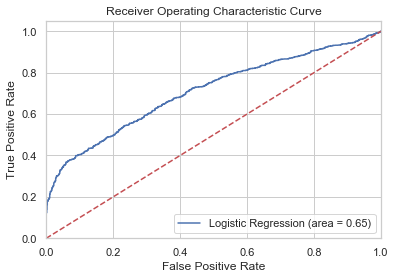

In [261]:
# Seperate out the values from the dataset to run in our model
X = features_df.values
y = df['party_Democrat'].values

# Split data into test/train set (70/30 split) and shuffle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Set an instance of LogisticRegression as the model
model = LogisticRegression(solver='liblinear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Determine the accuracy from the testing data
print('Initial Accuracy Score: ' + str(accuracy_score(model.predict(X_test), y_test)))

# Use GridSearchCV to find the best C parameter value
parameters = {"C": [0.00001, 0.0001, 0.001, 0.1, 1]}
fitmodel = GridSearchCV(model, param_grid=parameters, cv=5, scoring="accuracy")
fitmodel.fit(X_test, y_test)
print('Best C hyperparameter: ' + str(fitmodel.best_params_))

# Use the new best C parameter value on the fitted model
fitted_model = LogisticRegression(C=fitmodel.best_params_['C'], solver='liblinear')
fitted_model.fit(X_train, y_train)
yprediction = fitted_model.predict(X_test)
print('Fitted Accuracy Score: ' + str(accuracy_score(yprediction, y_test)))

# Produce an ROC curve to visualize the model's accuracy
logit_roc_auc = roc_auc_score(y_test, fitted_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, fitted_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()